# Credit Card Default Prediction Using Machine Learning: A Comparative Study with XGBoost Optimization

### Introduction:
Credit risk represents the potential financial loss a lender or investor might incur if a borrower fails to meet their loan repayment or other financial commitments. It reflects the danger of default arising from a borrower’s inability or unwillingness to repay the borrowed funds. For banks, financial institutions, and investors, credit risk is a critical issue, as it can significantly reduce the value of their investments or, in some cases, lead to a total loss of the principal amount.

To mitigate this risk, lenders and investors rely on credit scoring models, detailed borrower assessments, and the establishment of credit limits and collateral requirements. However, traditional methods often lack the precision needed to predict defaults early and accurately. Machine learning models have become invaluable in this area, providing a data-driven approach to identifying high-risk borrowers before defaults occur.

In this project, we develop a credit risk model to predict the likelihood of a client defaulting on their credit card payment for a bank in Taiwan. Using a comparative approach, we explore various machine learning models, including XGBoost, to identify the most effective method for assessing credit 
risk.


### Objective:
The goal of this project is to predict the likelihood of credit card default in the upcoming month using various machine learning models. This predictive model will assist financial institutions in assessing credit risk, thereby reducing potential financial losses due to client defaults. The dataset utilized comes from a Taiwanese bank and contains information on 30,000 credit card clients.

### Methodology:
1. **Data Preprocessing**:
   - **Dataset**: The dataset contains 25 features, including demographic data (e.g., age, gender, education) and financial behavior (e.g., payment status, bill amounts).
   - **Cleaning**: Removed irrelevant features such as `ID`, and grouped unknown categories in `EDUCATION` and `MARRIAGE` for better clarity.
   - **Balancing**: The target variable (`Default`) was highly imbalanced, with 22% defaults. The SMOTE (Synthetic Minority Over-sampling Technique) algorithm was used to balance the training data.
   - **Feature Scaling**: StandardScaler was used to normalize the features before training the models.

2. **Feature Engineering and Visualization**:
   - Visualized various demographic and financial features such as `AGE`, `SEX`, and `EDUCATION` to explore their distributions and relationship with default rates.
   - Analyzed correlations between features, particularly focusing on payment status (`PAY_0` to `PAY_6`) and bill amounts.

3. **Model Development**:
   - Four machine learning models were developed and evaluated:
     1. **Logistic Regression**
     2. **Decision Tree Classifier**
     3. **Random Forest Classifier**
     4. **XGBoost Classifier**
   - Each model was trained on the balanced dataset using an 80-20 train-test split.
   - Hyperparameter tuning was applied to XGBoost using RandomizedSearchCV to further optimize its performance.

4. **Evaluation Metrics**:
   - Each model was evaluated based on **accuracy**, **precision**, **recall**, **F1-score**, and the **confusion matrix**.
   - The **ROC-AUC curves** were plotted for each model to compare their performance in distinguishing between data-driven decisions to mitigate credit risk effectively.valuations


## Data Description:
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## Import Libraries: 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve



## Read the Data:

In [4]:
df=pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Data Pre-processing and Data Visualization:

## 1) Data Pre-processing: 

In [5]:
# First, we check if there are missing data: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

* There are no missing data for our database. Next, we take look into more details to the data.
* "default.payment.next.month" is a feature and is the target variable we are trying to predict.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* Total 30,000 clients in the dataset;

* The average amount of credit card is (NT dollar) 167,484. Minimal amount a credit card can receive is (NT dollar)10000 while max value is (NT dollar)1M

* In average, the client who owns a credit card is 35.48 year old in our sample, the yougest age one can get a credit card is 21 while the most senior  age is 79. 

* 22.1% of credit card contracts that will default next month 

### Drop ID and rename "default.payment.next.month"

In [7]:
df.drop(["ID"], axis=1, inplace= True) 
df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

In [8]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

### Drop repeated Categories:
Some categorical data have repeated categories. First, let check which features contain repeated catigories and then drop the repeated one:

In [9]:
ca=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in ca:
    print (i,df[i].unique())


SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]


### EDUCATION FEATURE:
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* category 4,5,6 and 0 can Group into class 4


In [10]:
df['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### MARRIAGE FEATURE:
* Marital status (1=married, 2=single, 3=others)
* We'll group categories 1 into category 3


In [11]:
df['MARRIAGE'].replace({0:3}, inplace=True)
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

## 2) Data Visualization:
### Target Variable:
We'll visualize the target column "default" to figure out how imblance (balance) the data is


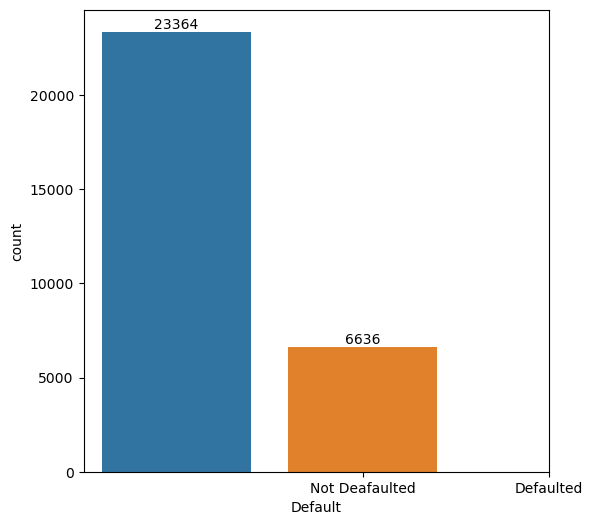

In [12]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x= df['Default'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([1,2], labels=["Not Deafaulted", "Defaulted"])
plt.show()

The data is quite imbalance which about 22% of clients will default next month. 

### SEX Variable:

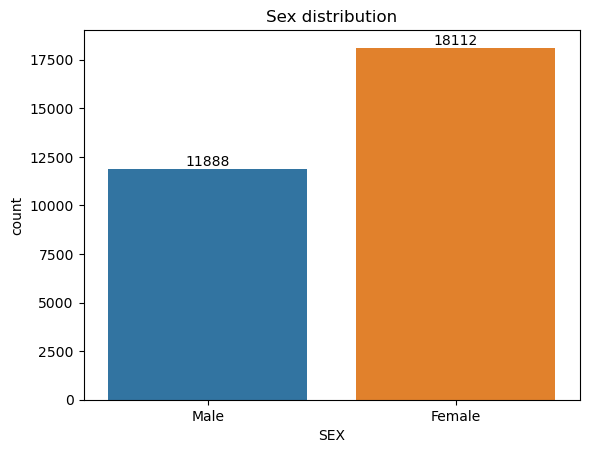

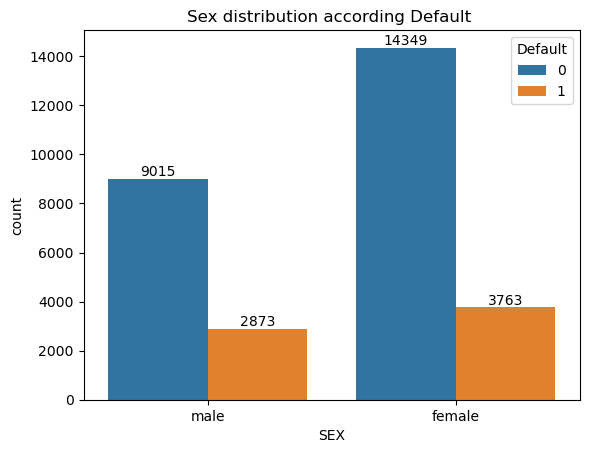

In [13]:
ax=sns.countplot(x= df['SEX'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Sex distribution")
plt.show()

ax=sns.countplot(data=df, x="SEX", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["male", "female"])
plt.title("Sex distribution according Default ")
plt.show()

* More Female clients own credit card than Male client. 
* 24% of male clients fraud credit card while the ratio for female is around 20%

### EDUCATION VARIABLE:


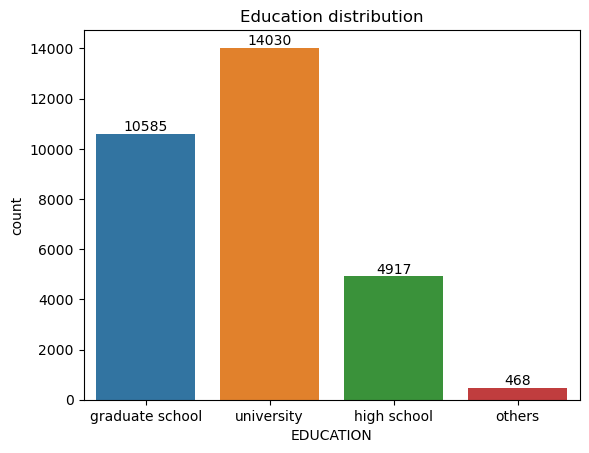

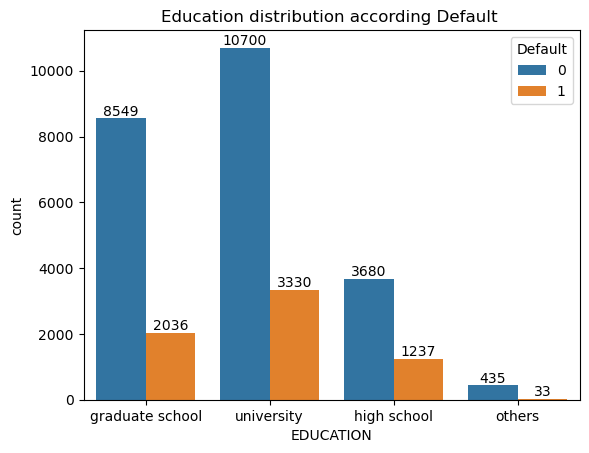

In [14]:
ax=sns.countplot(x= df['EDUCATION'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution")
plt.show()

ax=sns.countplot(data=df, x="EDUCATION", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school", "university",'high school','others'])
plt.title("Education distribution according Default ")
plt.show()

*  University students are the group which highest number customers using credit cards (47%)
* High school students are the group which has highest fraud cases(25%), follow by university student(23%)

### MARRIAGE STATUS VARIABLE:

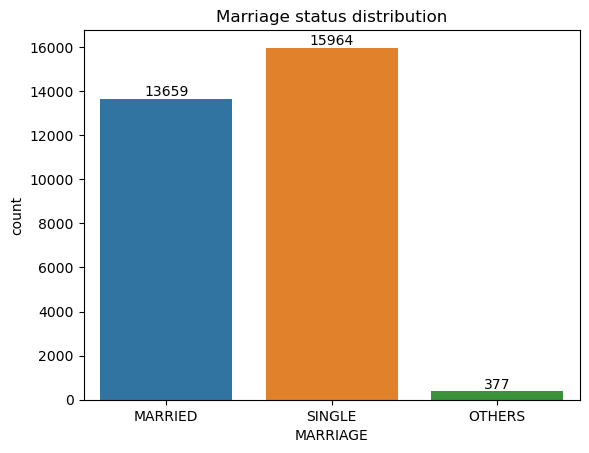

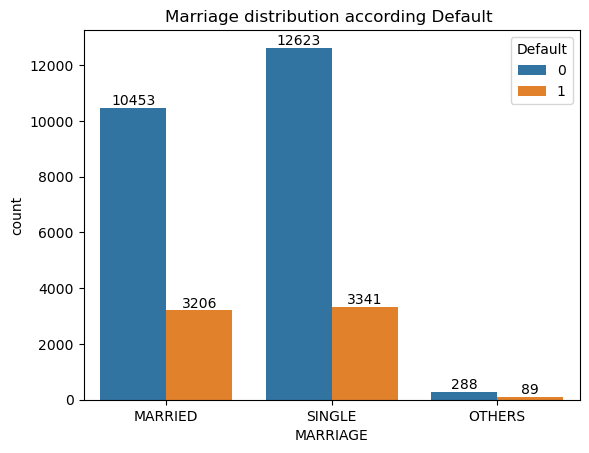

In [15]:
ax=sns.countplot(x= df['MARRIAGE'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage status distribution")
plt.show()

ax=sns.countplot(data=df, x="MARRIAGE", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MARRIED", "SINGLE",'OTHERS'])
plt.title("Marriage distribution according Default ")
plt.show()

* Single is the group which highest number of customers using credit cards (53%)
* Married people are the group which has highest fraud cases(30%)

### AGE VARIABLE:

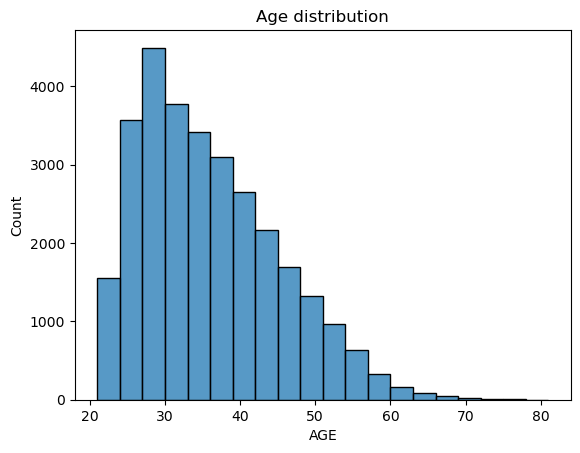

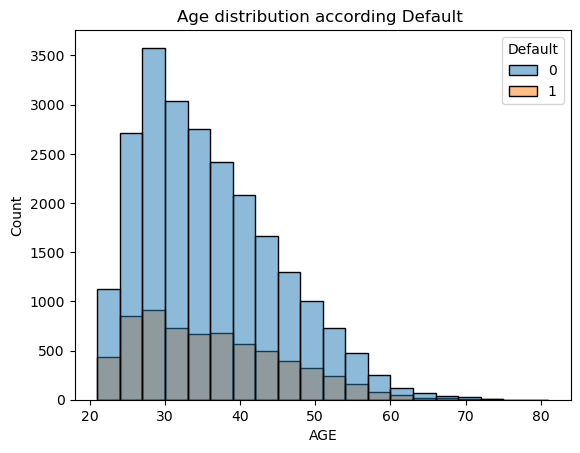

In [16]:
sns.histplot(data=df, x="AGE",binwidth=3)
plt.title("Age distribution")
plt.show()

sns.histplot(data=df, x="AGE", hue="Default", binwidth=3)
plt.title("Age distribution according Default ")
plt.show()

* Histogram is right-skewed meaning the older customers are less likely to use credit cards
* The main client is in  their 30s
* Customers in their 30s are also the most prone to credit fraud

### LIMIT_BAL VARIABLE:

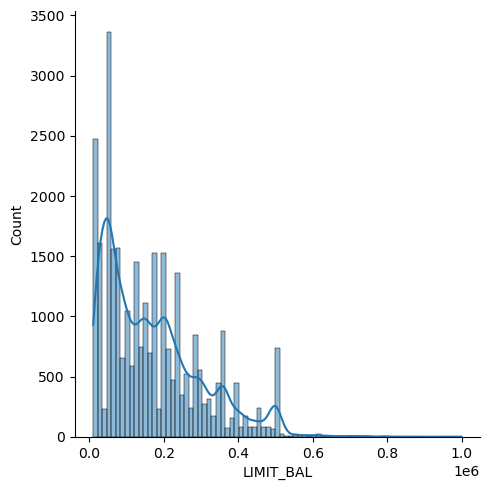

In [17]:
sns.displot(df.LIMIT_BAL, kde=True)

## Amount of bill statement and Amount of previous payment 

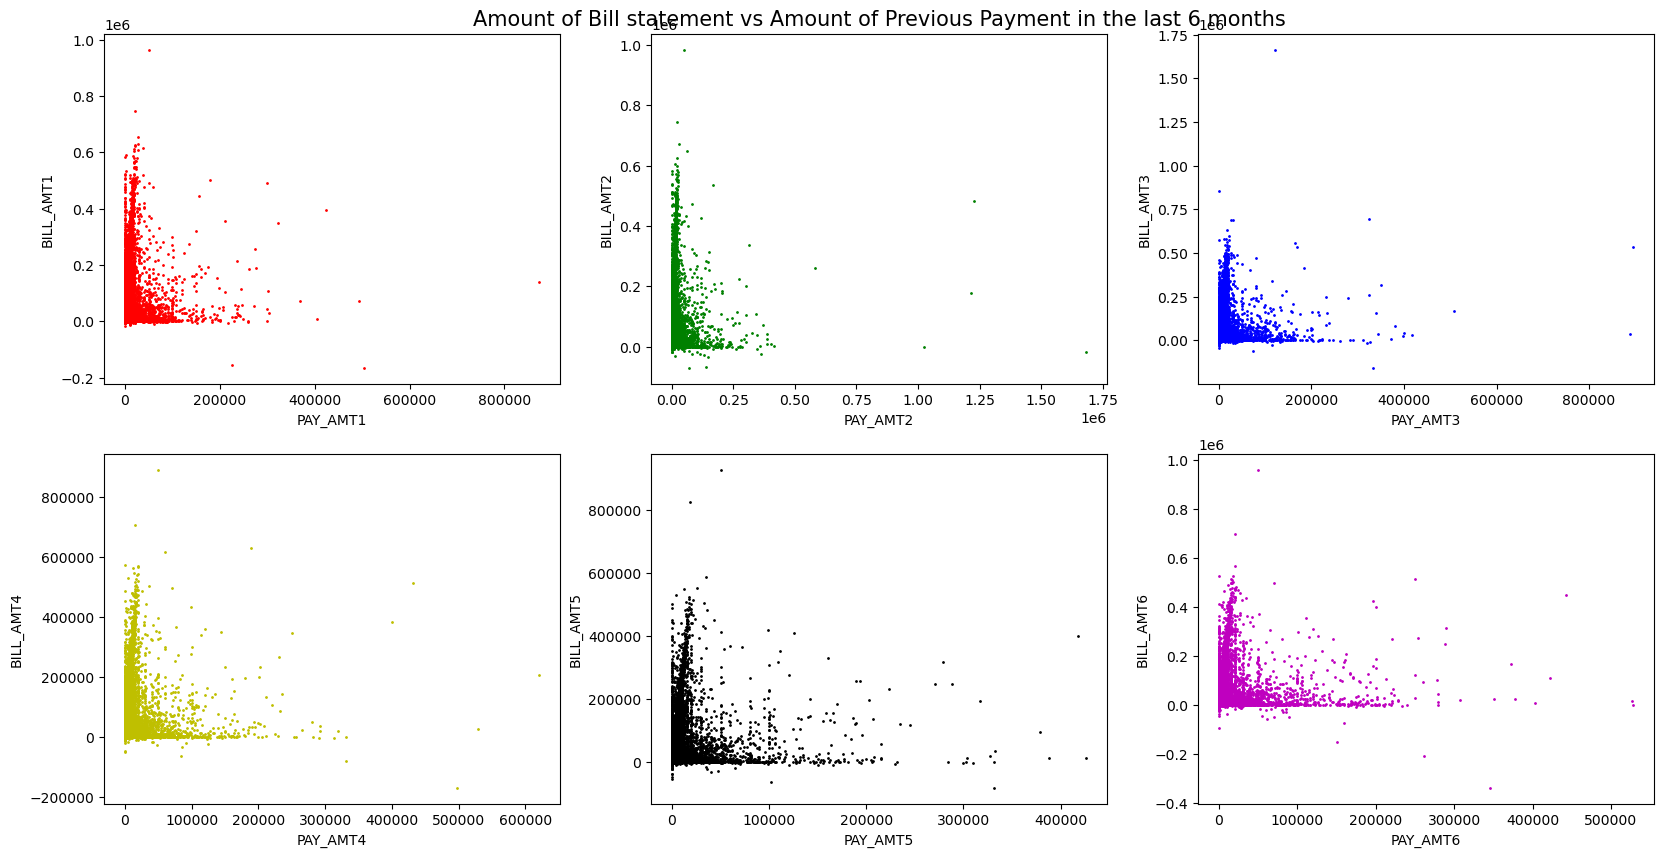

In [18]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Amount of Bill statement vs Amount of Previous Payment in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

## Correlation Analysis: 

<AxesSubplot:>

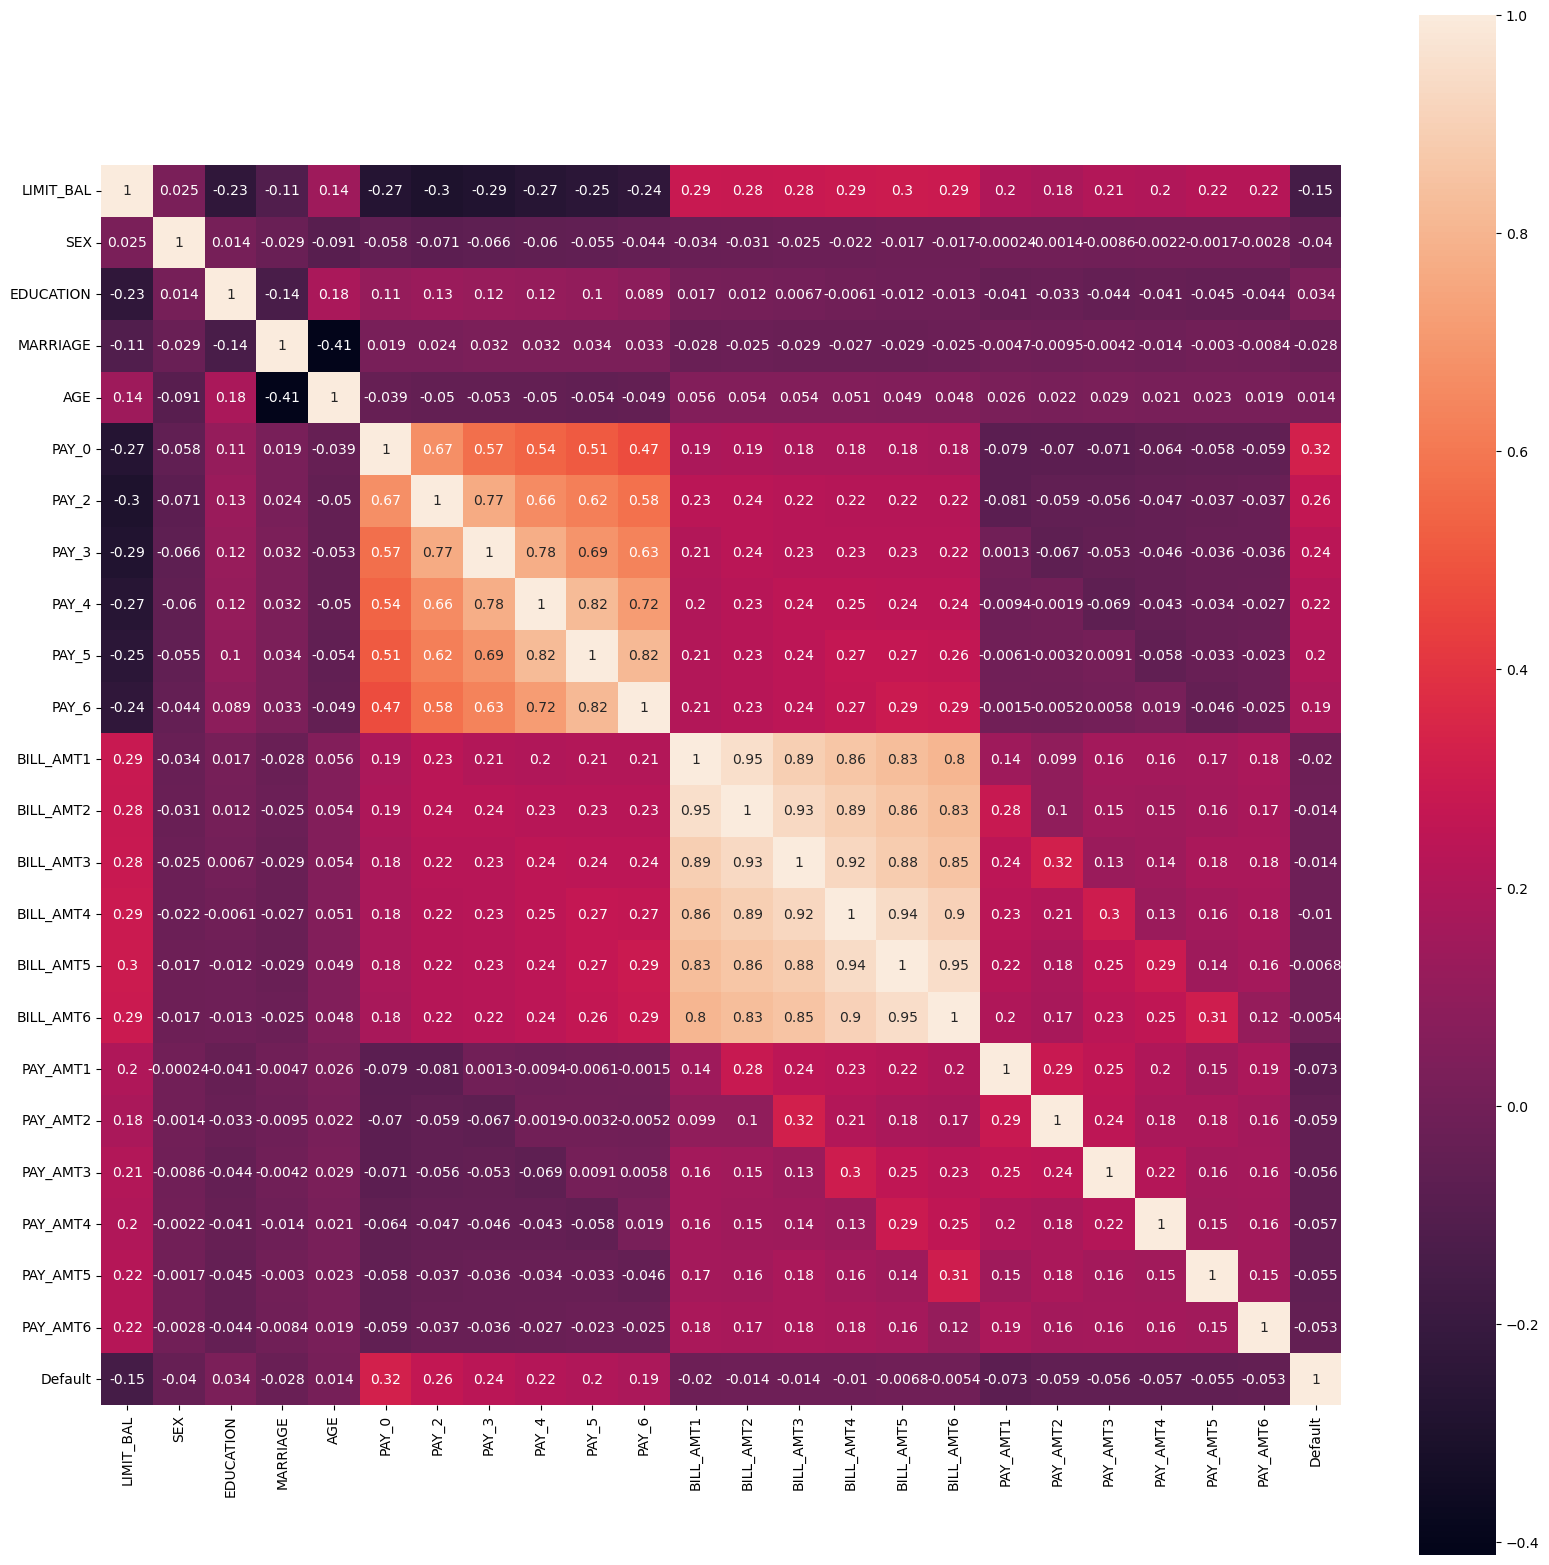

In [19]:

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,square = True)

Correlation is high among  PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. 

# MODELLING:

In [20]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

### Create target feaure and independent feature:

In [21]:

X = df.drop(['Default'], axis=1)

y = df['Default']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [22]:
### Feature Engineering: 

scaler= StandardScaler()
X= scaler.fit_transform(X)

## Balancing the data

The SMOTE algorithm works like this:

You select a random sample from the minority group.
You will determine the k nearest neighbours for the observations in this sample.
Then, using one of those neighbours, you will determine the vector between the current data point and the chosen neighbour.
The vector is multiplied by a random number between 0 and 1.
You add this to the current data point to get the synthetic data point.
This operation is essentially the same as moving the data point slightly in the direction of its neighbour. This ensures that your synthetic data point is not an exact replica of an existing data point, while also ensuring that it is not too dissimilar from known observations in your minority class.


In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)


In [24]:
# summarize class distribution

print("Before oversampling: ",Counter(y_train))
SMOTE= SMOTE()


X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18677, 1: 5323})
After oversampling:  Counter({0: 18677, 1: 18677})


## Building Model: 

### Logistic Regression
### Random Forest Classifier
### Decision Tree
### XGBoost Classifier

### a) Logistic Regression


Logit model's accuracy: 0.6858333333333333
              precision    recall  f1-score   support

           0       0.88      0.69      0.78      4687
           1       0.38      0.65      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.69      0.71      6000

confusion matrix of logistic regression


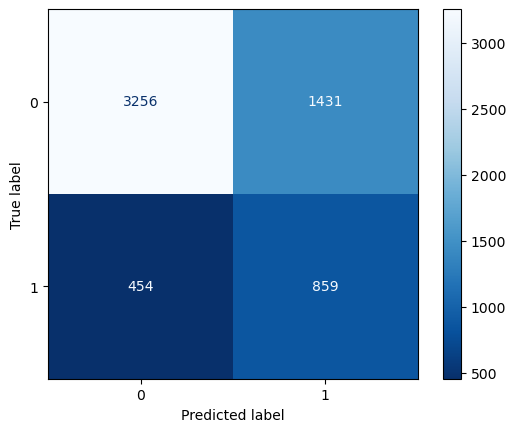

In [25]:
 
logit= LogisticRegression()
logit.fit(X_train, y_train)

pred_logit= logit.predict(X_test)



print("Logit model's accuracy:", accuracy_score(y_test, pred_logit))

print(classification_report(y_test, pred_logit))

print('confusion matrix of logistic regression')
plot_confusion_matrix(logit, X_test, y_test, cmap="Blues_r")



### b) Decision Tree Classifier:

Decision Tree Accuracy : 0.6731666666666667
              precision    recall  f1-score   support

           0       0.88      0.68      0.76      4687
           1       0.36      0.66      0.47      1313

    accuracy                           0.67      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.76      0.67      0.70      6000

confusion matrix of decision tree


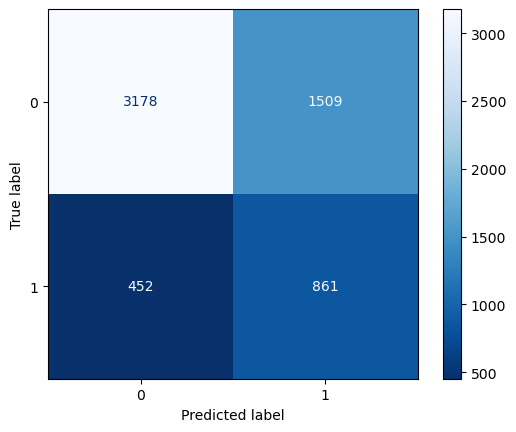

In [26]:
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
pred_tree = Tree.predict(X_test)
print('Decision Tree Accuracy :', accuracy_score(y_test,pred_tree))

print(classification_report(y_test, pred_tree))

print('confusion matrix of decision tree')
plot_confusion_matrix(Tree, X_test, y_test, cmap="Blues_r")


### c) Random Forest:

Random Forest Accuracy is: 0.7963333333333333
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4687
           1       0.54      0.47      0.50      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.68      0.69      6000
weighted avg       0.79      0.80      0.79      6000



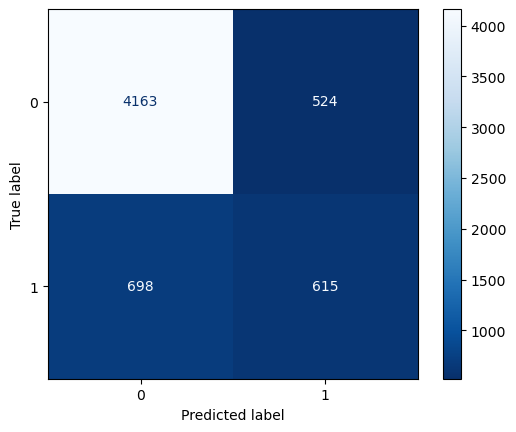

In [27]:

rf= RandomForestClassifier()

rf.fit(X_train,y_train)

pred_rf= rf.predict(X_test)

print("Random Forest Accuracy is:", accuracy_score(y_test, pred_rf))

print(classification_report(y_test,pred_rf ))

plot_confusion_matrix(rf, X_test, y_test, cmap="Blues_r")


### d) XGBoost:


XGBoost Accuracy: 0.8041666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4687
           1       0.57      0.42      0.48      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.67      0.68      6000
weighted avg       0.79      0.80      0.79      6000



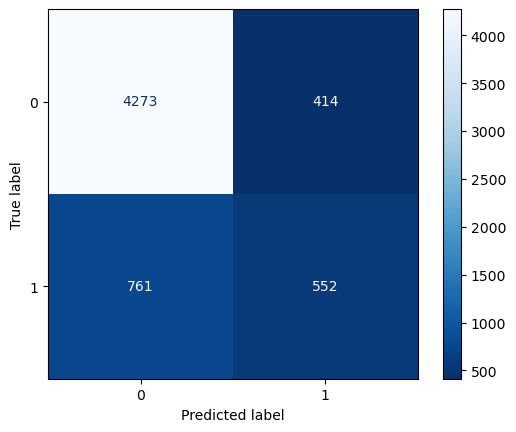

In [28]:
xgboost= xgb.XGBClassifier()


xgboost.fit(X_train,y_train)

xgboost_pred= xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))
print(classification_report(y_test,xgboost_pred ))
plot_confusion_matrix(xgboost, X_test, y_test, cmap="Blues_r")

### Hyper parameter turning: 

In [29]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [30]:
random_search=RandomizedSearchCV(xgboost,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
    

In [31]:
# Best estimators:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
#  best param
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 12,
 'learning_rate': 0.15,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [33]:
classifier=XGBClassifier(objective='binary:logistic',
                                  min_child_weight=3,
                                 max_depth=10,
                                 learning_rate=0.25,
                                 gamma=0.1,
                                  colsample_bynode=1,
                                  colsample_bytree=0.4,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=1, colsample_bytree=0.4,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.25, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [34]:
# Predicting model
hyper_pred= classifier.predict(X_test)

print("The accuracy of the model is:", accuracy_score(y_test, hyper_pred))



The accuracy of the model is: 0.8055


## Compare Model Performance:

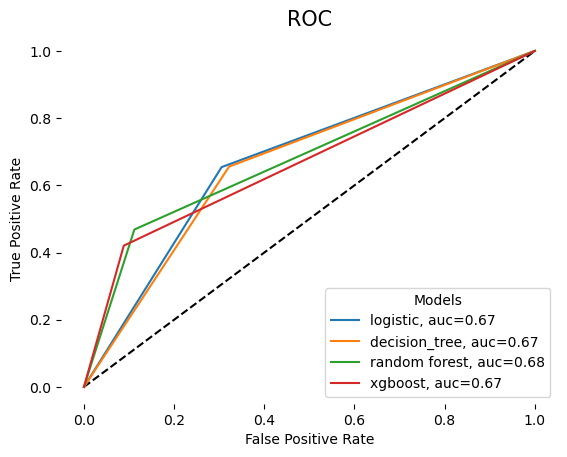

In [35]:
# logistic model 
pred_logit= logit.predict(X_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test,  pred_logit)
auc1 = metrics.roc_auc_score(y_test, pred_logit)

# decision tree model:
pred_tree = Tree.predict(X_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  pred_tree)
auc2 = metrics.roc_auc_score(y_test, pred_tree)

# random forest model: 
pred_rf= rf.predict(X_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test,  pred_rf)
auc3 = metrics.roc_auc_score(y_test, pred_rf)

# XGboost:
xgboost_pred= xgboost.predict(X_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  xgboost_pred)
auc4 = metrics.roc_auc_score(y_test, xgboost_pred)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="logistic, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="decision_tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="random forest, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="xgboost, auc="+str(round(auc4,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.show()

In [36]:
data = {'logistic':68.08,
                'decision_tree':72.83,
               'randome_forest': 79.35,
                'xgboost': 81.35,
               'xgboost_hyper':80.58}
courses = list(data.keys())
values = list(data.values())

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

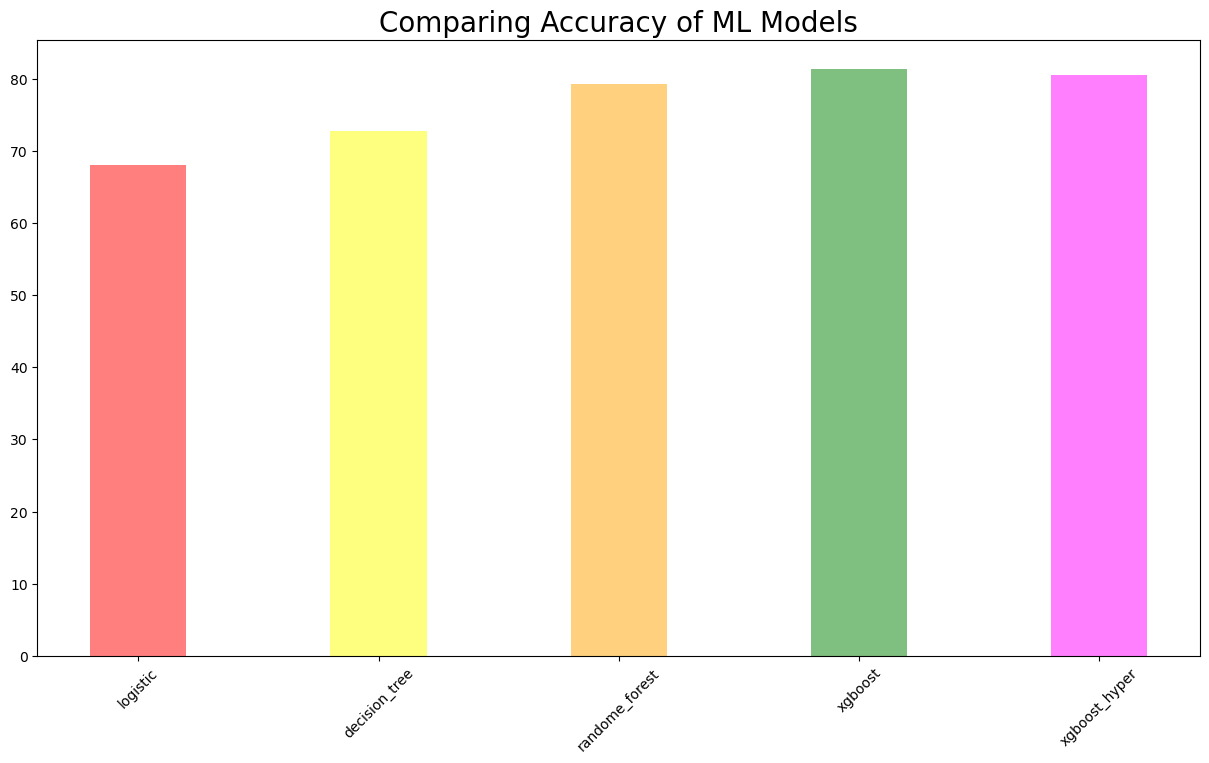

In [37]:
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','green','magenta'
    ]
plt.bar(courses, values, color =colors,alpha=0.5,width = 0.4)
plt.xticks(rotation = 45)

### Results Comparison:
1. **Logistic Regression**:  
   - **Accuracy**: 68.58%  
   - **Precision**: 0.88 (non-default), 0.38 (default)

2. **Decision Tree**:  
   - **Accuracy**: 67.32%  
   - **Precision**: 0.88 (non-default), 0.36 (default)

3. **Random Forest**:  
   - **Accuracy**: 79.63%  
   - **Precision**: 0.86 (non-default), 0.54 (default)

4. **XGBoost**:  
   - **Accuracy**: 80.42%  
   - **Precision**: 0.85 (non-default), 0.57 (default)

5. **XGBoost (with hyperparameter tuning)**:  
   - **Accuracy**: 80.55%  
   - **Precision**: 0.85 (non-default), 0.57 (default)

### Conclusion:
This project successfully demonstrated the application of machine learning models for credit card default prediction. The Random Forest and XGBoost models outperformed Logistic Regression and Decision Tree models, with XGBoost achieving the highest accuracy (80.55%) after hyperparameter tuning. While XGBoost provided the best results, its margin over Random Forest was small, suggesting both models are strong candidates for credit default prediction.

Overall, XGBoost is the recommended model for this use case due to its superior performance in terms of accuracy and precision. This model can assist financial institutions in making data-driven decisions to mitigate credit risk effectively.

Author - *Rajarshi Das*